# 02: RNN Architecture Exploration

Recurrent Neural Networks are an specific type of neural network architecture which are able to encode tempral relationships. An RNN cell gets and input and creates an output at every time step. The output is then fed in the next cell again. With the output of the previous cell and the input at the current time steps, the RNN cell can detect temporal relatiionships much better. In the picture below you can see how each input and output of the previous cell is fed into the current cell. Furthermore, there are two ways of sketching such an architecture.

![RNN Architecture](https://miro.medium.com/max/3172/1*mHimR6ok4bAEYhKESwhdrg.png)

#### Keras Example

For this example, we are using LSTM cells which stands for Long-Short-Term-Memory cells. This is because the cell has a specific internal structure that allows it to decide which information it should forget and which information it should keep. You can see the structure of an LSTM cell in the figure below.
![LSTM Cell](https://i.stack.imgur.com/Iv3nU.png)

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

model = keras.Sequential([
    keras.layers.LSTM(32, input_shape=(28,28), activation='relu', return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs = 4, batch_size= 32, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 29s 481us/sample - loss: 0.7509 - accuracy: 0.7425 - val_loss: 0.2121 - val_accuracy: 0.9361
Epoch 2/4
60000/60000 [==============================] - 27s 450us/sample - loss: 0.2497 - accuracy: 0.9259 - val_loss: 0.1555 - val_accuracy: 0.9567
Epoch 3/4
60000/60000 [==============================] - 28s 460us/sample - loss: 0.1732 - accuracy: 0.9503 - val_loss: 0.1010 - val_accuracy: 0.9700
Epoch 4/4
60000/60000 [==============================] - 28s 464us/sample - loss: 0.1427 - accuracy: 0.9598 - val_loss: 0.0868 - val_accuracy: 0.9748


#### Visualizations
To keep track of the training process and adjust hyperparameters properly you should always keep track of the training history. Luckily, Keras provides us with the actual training history as a return value of the model.fit function. We can then use matplotlib to visualize our results in a very straightforward manner.

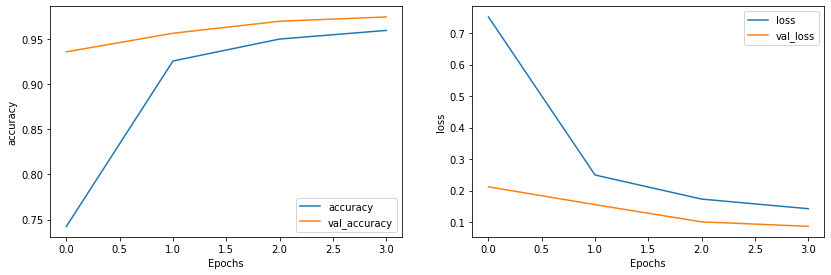

In [38]:
def plot_graphs(history):
    plt.figure(figsize=(150,50))
    
    plt.subplot(10,20,1)
    plt.plot(history.history["accuracy"])
    plt.plot(history.history['val_accuracy'], '')
    plt.xlabel("Epochs")
    plt.ylabel('accuracy')
    plt.legend(['accuracy', 'val_accuracy'])
    
    plt.subplot(10,20,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'], '')
    plt.xlabel("Epochs")
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'])
    
    plt.show()
    
plot_graphs(history)

## Takeaways
1. You should always capture the training history including your training and validation performance. This will allow you to plot the improvement of accuracy and loss over time. It is important to do that because you will be able to recognize if your model overfits and maybe the learning rate is too high. Additionally, you need to pass the validation data to the model.fit function in order to obtain validation results. However, you can also specify the validation split so that Keras knows how much of the training data it should set aside in order to use that data for validation. The following code snippets show how you can set the validation data and record the history properly:
```python
history = model.fit(x_train,y_train, epochs = 4, batch_size= 32, validation_data=(x_test, y_test))
history = model.fit(x_train,y_train, epochs = 4, batch_size= 32, validation_split=0.2)
```